In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle

with open('randomForest_model.p', 'rb') as f1:
    randomForest_under = pickle.load(f1)
    
with open('grid_xgb.p', 'rb') as f2:
    grid_xgb = pickle.load(f2)
    
with open('app_train.p', 'rb') as f3:
    app_train = pickle.load(f3)
    

In [3]:
from sklearn.model_selection import train_test_split

X = app_train.drop(columns='TARGET').copy()
y = app_train['TARGET'].copy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1944)

# SHAP pour interpreter resultat
https://towardsdatascience.com/one-feature-attribution-method-to-supposedly-rule-them-all-shapley-values-f3e04534983d

https://towardsdatascience.com/demystify-your-ml-model-with-shap-fc191a1cb08a

https://towardsdatascience.com/lime-vs-shap-which-is-better-for-explaining-machine-learning-models-d68d8290bb16

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

https://medium.com/dataman-in-ai/explain-your-model-with-lime-5a1a5867b423

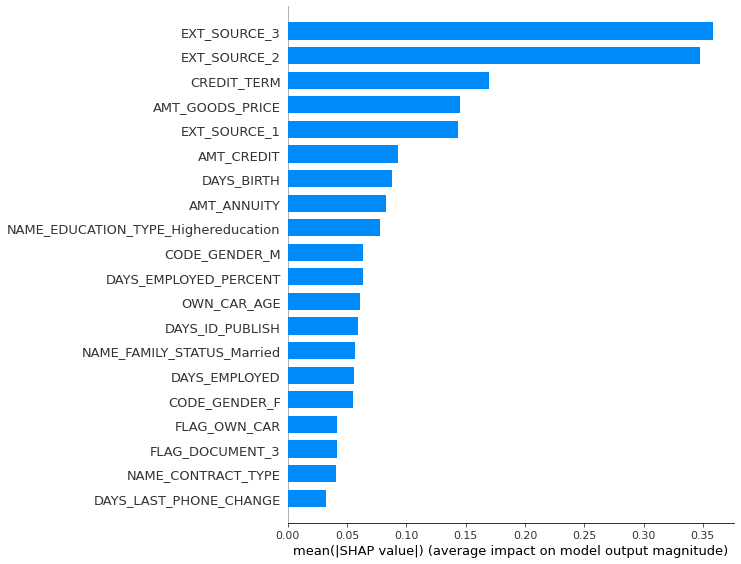

In [4]:
# conda install -c conda-forge shap
import shap

explainer_shap = shap.TreeExplainer(grid_xgb)

shap_values_xgb = explainer_shap.shap_values(X_val)

shap.summary_plot(shap_values_xgb, X_val, plot_type="bar")

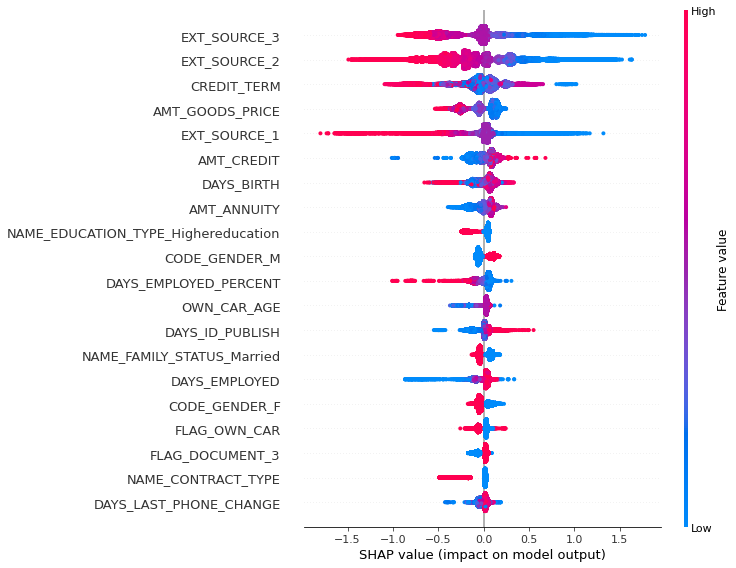

In [80]:
f = plt.figure()
shap.summary_plot(shap_values_xgb, X_val)
f.savefig("summary_plot_xgb.png", bbox_inches='tight', dpi=600)

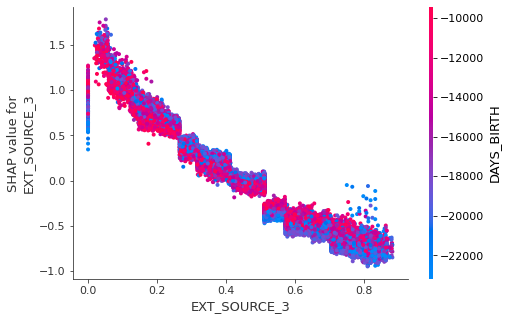

In [89]:
import shap
# make plot.
#shap.dependence_plot('EXT_SOURCE_3', shap_values_xgb, X_val, interaction_index="EXT_SOURCE_2")
shap.dependence_plot('EXT_SOURCE_3', shap_values_xgb, X_val)

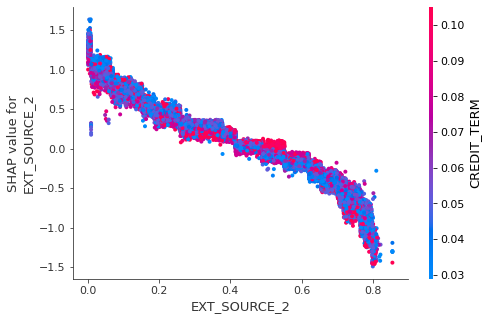

In [90]:
import shap
# make plot.
shap.dependence_plot('EXT_SOURCE_2', shap_values_xgb, X_val)

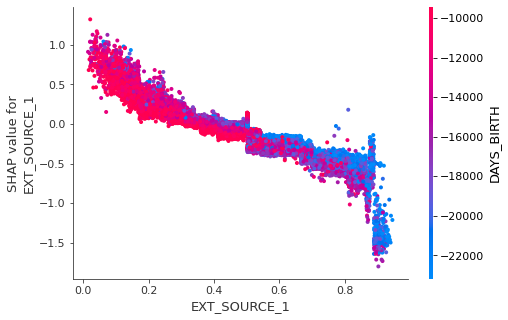

In [91]:
import shap
# make plot.
shap.dependence_plot('EXT_SOURCE_1', shap_values_xgb, X_val)

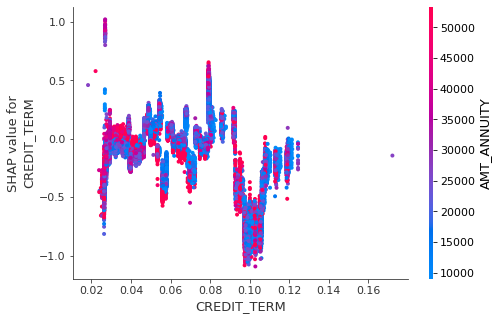

In [92]:
shap.dependence_plot('CREDIT_TERM', shap_values_xgb, X_val)

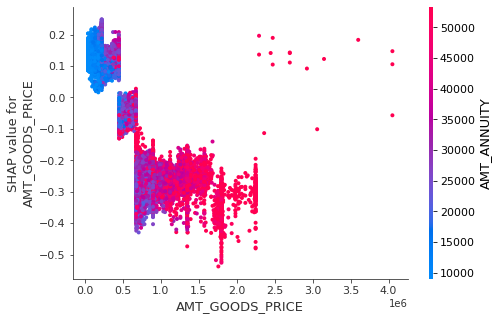

In [93]:
shap.dependence_plot('AMT_GOODS_PRICE', shap_values_xgb, X_val)

In [84]:
explainer_shap.expected_value

-0.14003012

In [5]:
i=1944

shap.initjs()
shap.force_plot(explainer_shap.expected_value, shap_values_xgb[i,:], X_val.iloc[i,:])

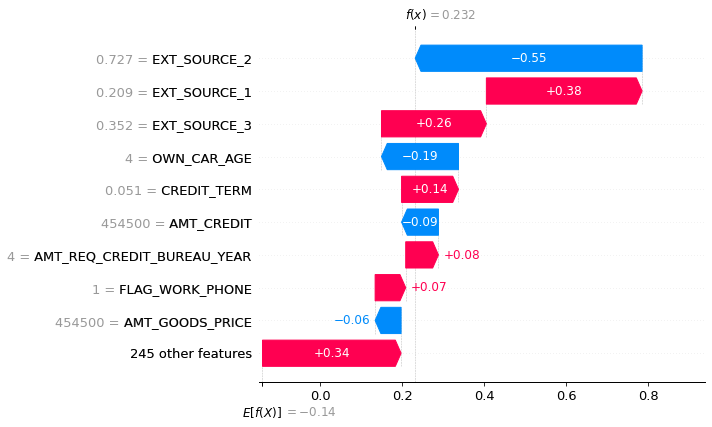

In [87]:
i=1944

class ShapObject:
    
    def __init__(self, base_values, data, values, feature_names):
        self.base_values = base_values # Single value
        self.data = data # Raw feature values for 1 row of data
        self.values = values # SHAP values for the same row of data
        self.feature_names = feature_names # Column names
        
shap_object = ShapObject(base_values = explainer_shap.expected_value,
                         values = shap_values_xgb[i,:],
                         feature_names = features,
                         data = X_val.iloc[i,:])

shap.waterfall_plot(shap_object)

In [88]:
import lime
from lime import lime_tabular

explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[0,1],
    mode='classification'
)

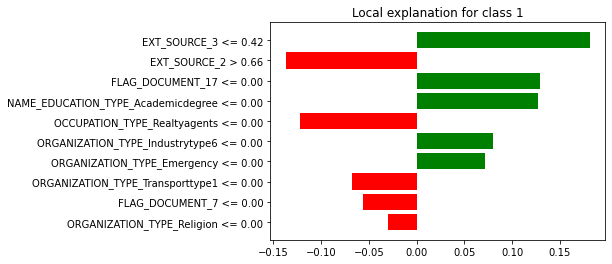

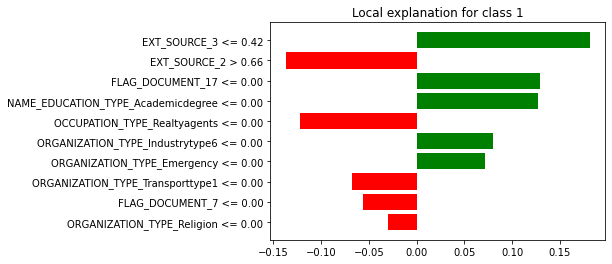

In [95]:
exp = explainer_lime.explain_instance(
    data_row=X_val.iloc[i,:], 
    predict_fn=grid_xgb.predict_proba
)

exp.show_in_notebook(show_table=True)
exp.as_pyplot_figure()

In [20]:
shap_values_xgb.shape

(246008, 254)

In [21]:
X_val.shape

(61503, 254)

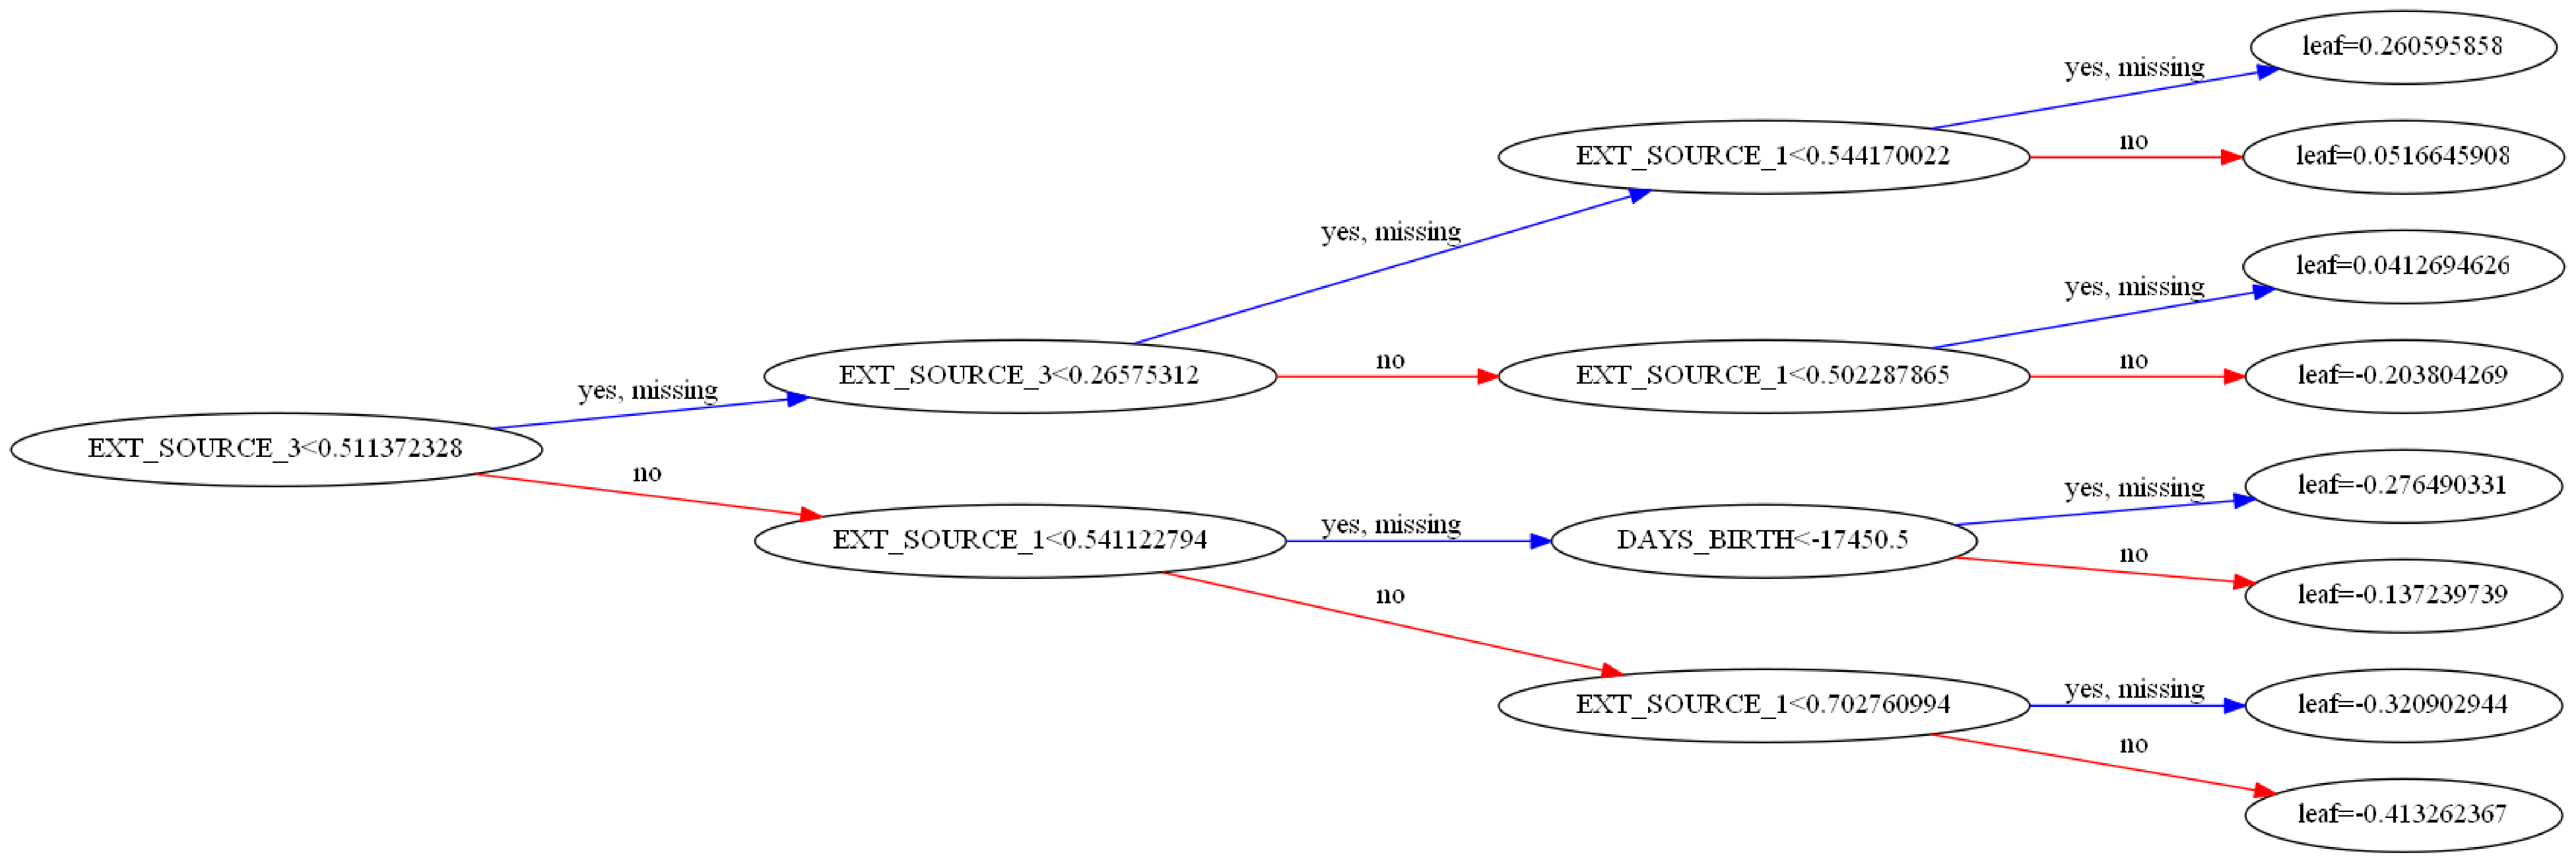

In [12]:
# conda install -c anaconda graphviz
# conda install python-graphviz
from xgboost import plot_tree
# plot single tree
plot_tree(grid_xgb, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(100, 100)

plt.show()